In [1]:
from mauspad_score import *

import pandas as pd
import bt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
symbols = ['LNTH', 'MANH', 'GOOG', 'TSLA', 'AMKR', 'MDU']
thresholds = {"ev_mc": 2,
                "netto_debt": 2,
                "ev_ebit": 20,
                "net_profit_margin": 10,
                "roe": 15}

scores = pd.DataFrame()
prices = pd.DataFrame()
for symbol in symbols:   
    m_score = Mauspad_score(symbol, "2012-01-01", "2022-12-31")
    score = m_score.get_score(thresholds)
    price = m_score.prices[["Close"]]
    price.columns = [symbol]

    scores = pd.concat([scores, score], axis=1)
    prices = pd.concat([prices, price], axis=1)

print(scores.head(1), prices.head(1))

Starting with LNTH
Starting with MANH
{'error': 'Daily limit of API calls reached.'}


NameError: name 'exit' is not defined

Stat                 above3      long
-------------------  ----------  ----------
Start                2022-03-30  2022-03-30
End                  2022-12-31  2022-12-31
Risk-free rate       0.00%       0.00%

Total Return         -11.31%     -16.35%
Daily Sharpe         -3.15       -8.20
Daily Sortino        -3.85       -10.18
CAGR                 -14.68%     -21.04%
Max Drawdown         -19.53%     -16.35%
Calmar Ratio         -0.75       -1.29

MTD                  -           -
3m                   8.06%       -8.24%
6m                   10.22%      -3.89%
YTD                  -11.31%     -16.35%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  -14.68%     -21.04%

Daily Sharpe         -3.15       -8.20
Daily Sortino        -3.85       -10.18
Daily Mean (ann.)    -596.62%    -1037.30%
Daily Vol (ann.)     189.60%     126.52%
Daily Skew           -1.50       0.00
Daily Kur

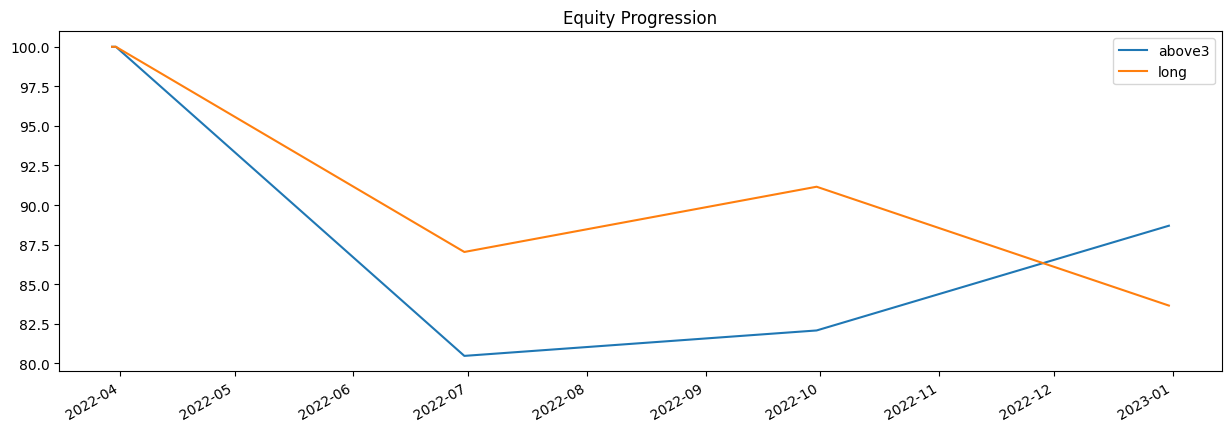

In [ ]:
def above_3():
    # first we create the Strategy
    s = bt.Strategy('above3', [
                                bt.algos.RunQuarterly(run_on_end_of_period=True),
                                bt.algos.SelectWhere(scores >= 3),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()])

    # now we create the Backtest
    return bt.Backtest(s, prices)

def long_only_ew():
    s = bt.Strategy('long', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, prices)
    
# and let's run it!
res = bt.run(above_3(), long_only_ew())
res.plot()
res.display()